In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import scipy.stats as stats

In [ ]:
Duration = '1y'
HDFC_1d = yf.download('HDFCBANK.NS',
                      period=Duration,
                      progress=False,interval ='1d'
)
HDFC_1d.head() #Fix the Time Period for the data of interval of 1-Day


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-13,1590.099976,1609.000000,1590.099976,1603.500000,1581.898438,13963054
2023-06-14,1610.449951,1612.000000,1600.199951,1601.750000,1580.171997,10056984
2023-06-15,1604.000000,1605.949951,1579.000000,1582.050049,1560.737427,17688738
2023-06-16,1587.150024,1609.199951,1584.000000,1602.750000,1581.158569,7889636
2023-06-19,1611.000000,1614.250000,1598.349976,1604.150024,1582.539795,12414573


In [ ]:
HDFC_1d_SD = statistics.stdev(HDFC_1d['Adj Close'])#sigma(risk) of price for bollinger

In [ ]:
SMA = [20,50,100,200]
for i in SMA:
    HDFC_1d[f'SMA_{i}'] = HDFC_1d['Adj Close'].rolling(i).mean()


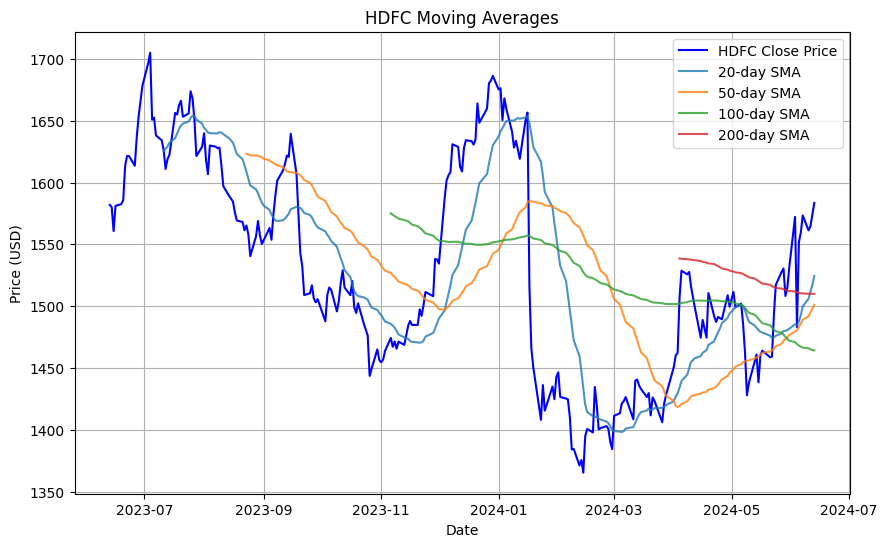

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(HDFC_1d['Adj Close'], label='HDFC Close Price', color='blue')
for i in SMA:
    plt.plot(HDFC_1d[f'SMA_{i}'], label=f'{i}-day SMA', alpha=0.8)
plt.title('HDFC Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
Multiplier = k = 2 # Will be used in Bollinger Curves
SMA = [20,50,100,200]
for i in SMA:
    HDFC_1d[f'UBB_{i}'] = HDFC_1d[f'SMA_{i}'] + k*HDFC_1d_SD
    HDFC_1d[f'LBB_{i}'] = HDFC_1d[f'SMA_{i}'] - k*HDFC_1d_SD


In [ ]:
HDFC_1d.tail(30)

,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,SMA_100,SMA_200,UBB_20,LBB_20,UBB_50,LBB_50,UBB_100,LBB_100,UBB_200,LBB_200
Date,,,,,,,,,,,,,,,,,,
2024-05-02,1522.000000,1537.000000,1520.349976,1532.250000,1511.608276,16737503,1497.249390,1449.056499,1503.164128,1528.081127,1668.605674,1325.893106,1620.412783,1277.700215,1674.520412,1331.807845,1699.437411,1356.724843
2024-05-03,1533.250000,1540.599976,1507.199951,1519.599976,1499.128662,15932621,1499.195312,1451.139058,1502.278225,1527.386611,1670.551596,1327.839029,1622.495342,1279.782774,1673.634509,1330.921941,1698.742895,1356.030327
2024-05-06,1522.000000,1534.500000,1517.150024,1522.650024,1502.137695,14396698,1501.185632,1453.166375,1501.281339,1526.726624,1672.541916,1329.829348,1624.522658,1281.810091,1672.637623,1329.925055,1698.082907,1355.370340
2024-05-07,1521.949951,1524.050049,1504.150024,1506.150024,1485.859985,14240301,1500.127582,1454.923384,1500.081227,1526.024955,1671.483866,1328.771298,1626.279668,1283.567100,1671.437511,1328.724943,1697.381239,1354.668672
2024-05-08,1495.949951,1496.949951,1480.349976,1482.650024,1462.676514,20843931,1496.827643,1455.482744,1498.623138,1525.283580,1668.183927,1325.471359,1626.839028,1284.126460,1669.979422,1327.266855,1696.639864,1353.927296
2024-05-09,1474.949951,1486.750000,1445.300049,1447.500000,1428.000000,23140639,1491.939392,1455.647493,1496.593849,1524.328620,1663.295676,1320.583108,1627.003777,1284.291209,1667.950133,1325.237565,1695.684904,1352.972336
2024-05-10,1439.000000,1451.949951,1426.800049,1437.900024,1437.900024,13638304,1487.449957,1456.396960,1494.685264,1523.406389,1658.806241,1316.093673,1627.753244,1285.040677,1666.041548,1323.328980,1694.762673,1352.050105
2024-05-13,1432.000000,1459.800049,1430.300049,1455.250000,1455.250000,13523601,1484.429803,1457.472712,1493.111969,1522.401226,1655.786087,1313.073520,1628.828996,1286.116429,1664.468253,1321.755685,1693.757509,1351.044942
2024-05-14,1452.250000,1465.500000,1450.300049,1460.949951,1460.949951,12832571,1482.552930,1458.628921,1491.632175,1521.431467,1653.909214,1311.196646,1629.985205,1287.272637,1662.988459,1320.275891,1692.787751,1350.075183


In [ ]:
HDFC_1d['Change'] = HDFC_1d['Adj Close'] - HDFC_1d['Adj Close'].shift(1)

In [ ]:
HDFC_1d['Gain'] = HDFC_1d['Change'].apply(lambda x: x if x > 0 else 0)
HDFC_1d['Loss'] = HDFC_1d['Change'].apply(lambda x: -x if x < 0 else 0)


In [ ]:
HDFC_1d['Gain'].fillna(0, inplace=True)
HDFC_1d['Loss'].fillna(0, inplace=True)


In [ ]:
HDFC_1d.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,SMA_100,SMA_200,...,LBB_20,UBB_50,LBB_50,UBB_100,LBB_100,UBB_200,LBB_200,Change,Gain,Loss
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-13,1590.099976,1609.000000,1590.099976,1603.500000,1581.898438,13963054,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000
2023-06-14,1610.449951,1612.000000,1600.199951,1601.750000,1580.171997,10056984,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.726440,0.000000,1.72644
2023-06-15,1604.000000,1605.949951,1579.000000,1582.050049,1560.737427,17688738,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-19.434570,0.000000,19.43457
2023-06-16,1587.150024,1609.199951,1584.000000,1602.750000,1581.158569,7889636,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.421143,20.421143,0.00000
2023-06-19,1611.000000,1614.250000,1598.349976,1604.150024,1582.539795,12414573,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.381226,1.381226,0.00000


In [ ]:
Time_Period = 14
HDFC_1d['Avg.Gain'] = HDFC_1d['Gain'].rolling(Time_Period, min_periods=1).mean() # Ask once how many min_periods to take
HDFC_1d['Avg.Loss'] = HDFC_1d['Loss'].rolling(Time_Period, min_periods=1).mean() # Ask once how many min_periods to take


In [ ]:
HDFC_1d['RS'] =  HDFC_1d['Avg.Gain']/HDFC_1d['Avg.Loss']
HDFC_1d['RSI'] = 100 - 100/(1+HDFC_1d['RS'])
HDFC_1d['RSI']


Date
2023-06-13          NaN
2023-06-14     0.000000
2023-06-15     0.000000
2023-06-16    49.110354
2023-06-19    50.746400
                ...    
2024-06-07    65.955911
2024-06-10    64.680624
2024-06-11    64.991508
2024-06-12    62.425740
2024-06-13    60.594458
Name: RSI, Length: 246, dtype: float64

In [ ]:
HDFC_Indicators = pd.DataFrame()

for i in SMA:
    HDFC_Indicators['RSI'] = HDFC_1d['RSI']
    HDFC_Indicators[f'SMA_{i}'] = HDFC_1d[f'SMA_{i}']
    HDFC_Indicators[f'LBB_{i}'] = HDFC_1d[f'LBB_{i}']
    HDFC_Indicators[f'UBB_{i}'] = HDFC_1d[f'UBB_{i}']
HDFC_Indicators

,RSI,SMA_20,LBB_20,UBB_20,SMA_50,LBB_50,UBB_50,SMA_100,LBB_100,UBB_100,SMA_200,LBB_200,UBB_200
Date,,,,,,,,,,,,,
2023-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-14,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-15,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-16,49.110354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-19,50.746400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-07,65.955911,1499.892493,1328.536209,1671.248777,1489.012546,1317.656262,1660.368830,1466.546992,1295.190708,1637.903276,1510.282101,1338.925817,1681.638385
2024-06-10,64.680624,1506.062494,1334.706210,1677.418778,1491.770295,1320.414012,1663.126579,1465.877340,1294.521056,1637.233624,1510.103639,1338.747355,1681.459923
2024-06-11,64.991508,1511.539996,1340.183712,1682.896280,1494.942341,1323.586057,1666.298625,1465.188922,1293.832638,1636.545206,1509.981645,1338.625361,1681.337929


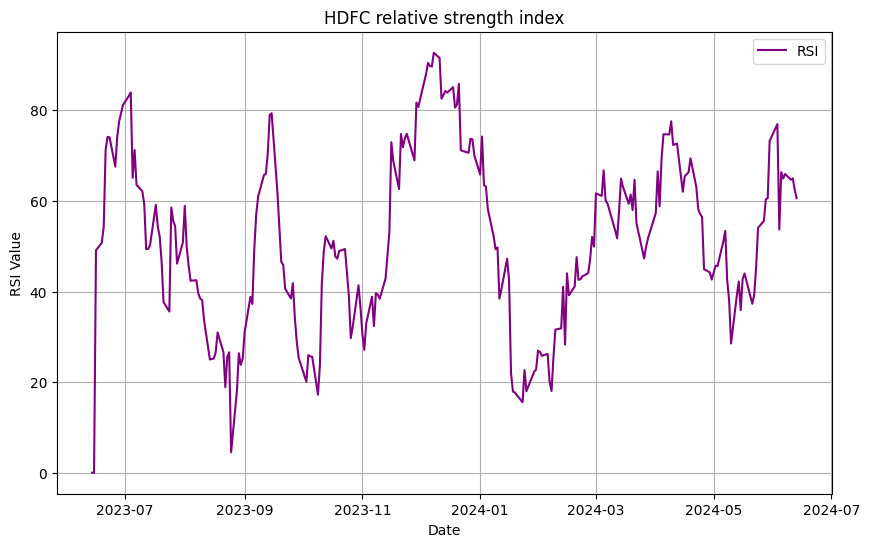

In [ ]:
#plotting the rsi
plt.figure(figsize=(10, 6))
plt.plot(HDFC_1d['RSI'], label='RSI', color='purple')
plt.title('HDFC relative strength index')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True)
plt.show()

starting with ADX

In [ ]:
high = HDFC_1d['High']#only using this three columns in this method
low = HDFC_1d['Low']
close = HDFC_1d['Close']

In [ ]:
#calculating the true range
HDFC_1d['TR'] = np.maximum(high - low, np.maximum(abs(high - close.shift(1)), abs(low - close.shift(1))))

In [ ]:
#calculating dms
HDFC_1d['+DM'] = np.where((high - high.shift(1)) > (low.shift(1) - low), np.maximum(high - high.shift(1), 0), 0)
HDFC_1d['-DM'] = np.where((low.shift(1) - low) > (high - high.shift(1)), np.maximum(low.shift(1) - low, 0), 0)

In [ ]:
#Smooth the TR, +DM, and -DM with a 14-day period
period = 14
HDFC_1d['TR_smooth'] = HDFC_1d['TR'].rolling(window=period).sum()
HDFC_1d['+DM_smooth'] = HDFC_1d['+DM'].rolling(window=period).sum()
HDFC_1d['-DM_smooth'] = HDFC_1d['-DM'].rolling(window=period).sum()

In [ ]:
#Calculate +DI and -DI
HDFC_1d['+DI'] = 100 * (HDFC_1d['+DM_smooth'] / HDFC_1d['TR_smooth'])
HDFC_1d['-DI'] = 100 * (HDFC_1d['-DM_smooth'] / HDFC_1d['TR_smooth'])
for i in range(period, len(HDFC_1d)):
    HDFC_1d.loc[HDFC_1d.index[i], '+DM_smooth'] = (HDFC_1d.loc[HDFC_1d.index[i-1], '+DM_smooth'] * (period - 1) + HDFC_1d.loc[HDFC_1d.index[i], '+DM']) / period
    HDFC_1d.loc[HDFC_1d.index[i], '-DM_smooth'] = (HDFC_1d.loc[HDFC_1d.index[i-1], '-DM_smooth'] * (period - 1) + HDFC_1d.loc[HDFC_1d.index[i], '-DM']) / period

In [ ]:
# Calculate Directional Index (DX)
HDFC_1d['DX'] = 100 * (abs(HDFC_1d['+DI'] - HDFC_1d['-DI']) / (HDFC_1d['+DI'] + HDFC_1d['-DI']))

In [ ]:
# Calculate ADX as the average of DX
HDFC_1d['ADX'] = HDFC_1d['DX'].rolling(window=period).mean()

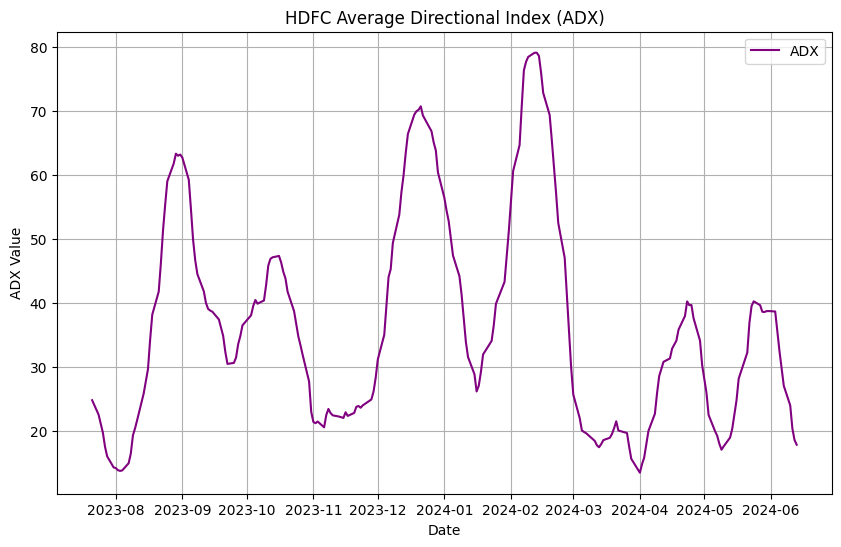

In [ ]:
# Plotting the ADX
plt.figure(figsize=(10, 6))
plt.plot(HDFC_1d['ADX'], label='ADX', color='purple')
plt.title('HDFC Average Directional Index (ADX)')
plt.xlabel('Date')
plt.ylabel('ADX Value')
plt.legend()
plt.grid(True)
plt.show()